## Bayesian Estimation Supersedes the t-Test

In [2]:
import numpy as np, scipy
import seaborn as sns, matplotlib.pyplot as plt
import pymc as pm
sns.set_theme()

In [5]:
y1 = np.random.normal(100, 2.0, size=8)
y2 = np.random.normal(103, 4.0, size=10)

(array([1., 2., 0., 0., 1., 0., 0., 2., 2., 2.]),
 array([ 96.78020934,  97.90557371,  99.03093809, 100.15630247,
        101.28166684, 102.40703122, 103.5323956 , 104.65775997,
        105.78312435, 106.90848873, 108.0338531 ]),
 <BarContainer object of 10 artists>)

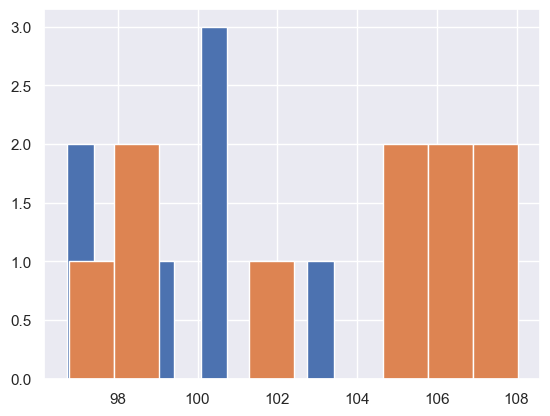

In [6]:
plt.hist(y1)
plt.hist(y2)

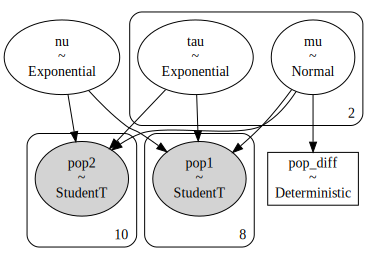

In [7]:
with pm.Model() as ttest:
    mu = pm.Normal("mu", mu=0, sigma=1e6, shape=2)
    tau = pm.Exponential("tau", 1/10, shape=2)

    nu = pm.Exponential("nu", 1/10)

    pop1 = pm.StudentT("pop1", nu=nu, mu=mu[0], sigma=1/tau[0], observed=y1)
    pop2 = pm.StudentT("pop2", nu=nu, mu=mu[1], sigma=1/tau[1], observed=y2)

    pop_diff = pm.Deterministic("pop_diff", mu[0] - mu[1])

pm.model_to_graphviz(ttest)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, tau, nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


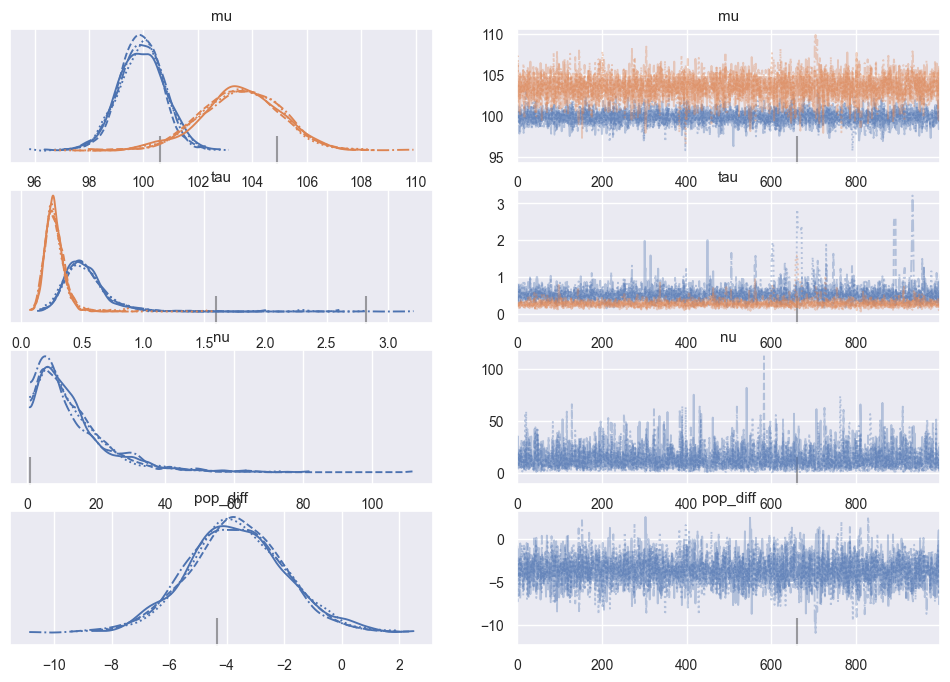

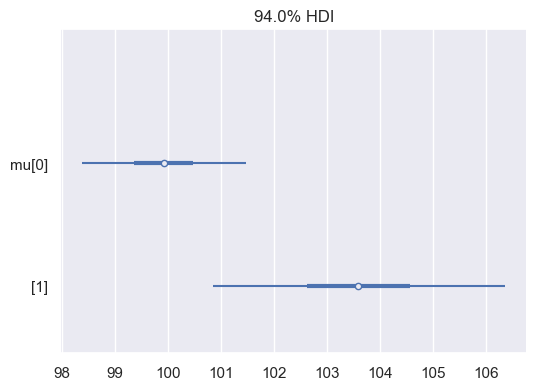

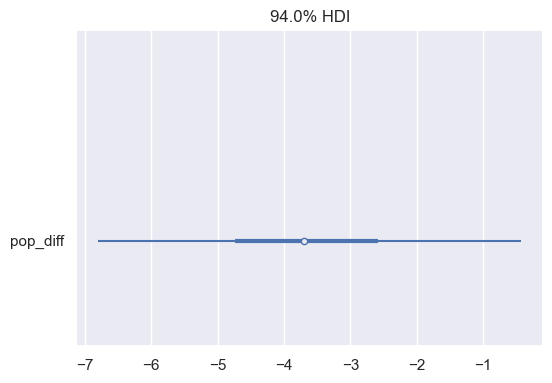

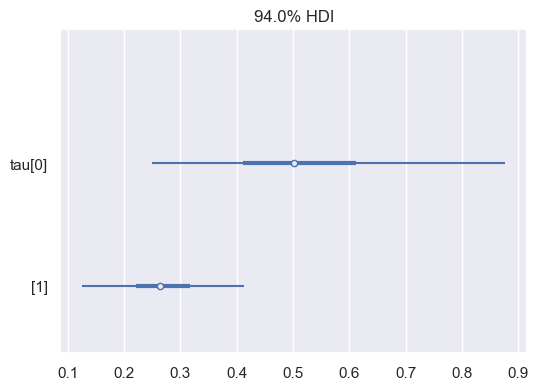

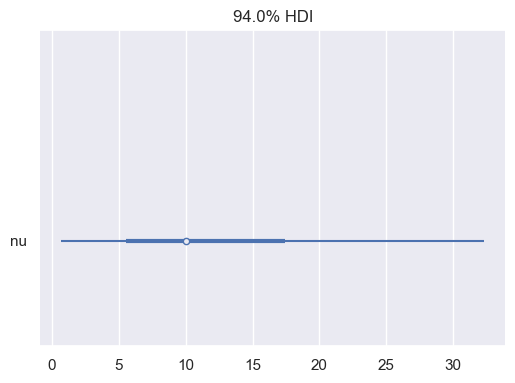

In [8]:
with ttest:
    trace = pm.sample()
    pm.plot_trace(trace)
    pm.plot_forest(trace, var_names=["mu"], combined=True)
    pm.plot_forest(trace, var_names=["pop_diff"], combined=True)
    pm.plot_forest(trace, var_names=["tau"], combined=True)
    pm.plot_forest(trace, var_names=["nu"], combined=True)